In [44]:
#imports
from __future__ import division
import nltk, re, pprint
from nltk import word_tokenize
from nltk.corpus import PlaintextCorpusReader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [24]:
ls ../..

097_SpeakerMap.txt  data/               environment/
README.md           descr_097.txt       speeches_097.txt


In [25]:
speakermap = pd.read_csv('../../097_SpeakerMap.txt', sep="|")
speakermap[:15]

,speakerid,speech_id,lastname,firstname,chamber,state,gender,party,district,nonvoting
0,97105301,970000005,PERCY,CHARLES,S,IL,M,R,NaN,voting
1,97105071,970000006,HUDDLESTON,WALTER,S,KY,M,D,NaN,voting
2,97106761,970000007,JACKSON,HENRY,S,WA,M,D,NaN,voting
3,97106981,970000008,STAFFORD,ROBERT,S,VT,M,R,NaN,voting
4,97104811,970000010,BAKER,HOWARD,S,TN,M,R,NaN,voting
5,97104811,970000012,BAKER,HOWARD,S,TN,M,R,NaN,voting
6,97107681,970000013,CRANSTON,ALAN,S,CA,M,D,NaN,voting
7,97104811,970000015,BAKER,HOWARD,S,TN,M,R,NaN,voting
8,97104811,970000016,BAKER,HOWARD,S,TN,M,R,NaN,voting
9,97104811,970000019,BAKER,HOWARD,S,TN,M,R,NaN,voting


In [26]:
len(speakermap)

202054

In [27]:
speakermap['fullname'] = speakermap.lastname.str.cat(speakermap.firstname, sep = ', ')
speakermap.head()

,speakerid,speech_id,lastname,firstname,chamber,state,gender,party,district,nonvoting,fullname
0,97105301,970000005,PERCY,CHARLES,S,IL,M,R,NaN,voting,"PERCY, CHARLES"
1,97105071,970000006,HUDDLESTON,WALTER,S,KY,M,D,NaN,voting,"HUDDLESTON, WALTER"
2,97106761,970000007,JACKSON,HENRY,S,WA,M,D,NaN,voting,"JACKSON, HENRY"
3,97106981,970000008,STAFFORD,ROBERT,S,VT,M,R,NaN,voting,"STAFFORD, ROBERT"
4,97104811,970000010,BAKER,HOWARD,S,TN,M,R,NaN,voting,"BAKER, HOWARD"


In [28]:
speakermap_unique = speakermap.drop_duplicates(subset='speakerid', keep='first', inplace=False)
speakermap_unique.head()

,speakerid,speech_id,lastname,firstname,chamber,state,gender,party,district,nonvoting,fullname
0,97105301,970000005,PERCY,CHARLES,S,IL,M,R,NaN,voting,"PERCY, CHARLES"
1,97105071,970000006,HUDDLESTON,WALTER,S,KY,M,D,NaN,voting,"HUDDLESTON, WALTER"
2,97106761,970000007,JACKSON,HENRY,S,WA,M,D,NaN,voting,"JACKSON, HENRY"
3,97106981,970000008,STAFFORD,ROBERT,S,VT,M,R,NaN,voting,"STAFFORD, ROBERT"
4,97104811,970000010,BAKER,HOWARD,S,TN,M,R,NaN,voting,"BAKER, HOWARD"


In [36]:
speakermap_unique.shape

(545, 11)

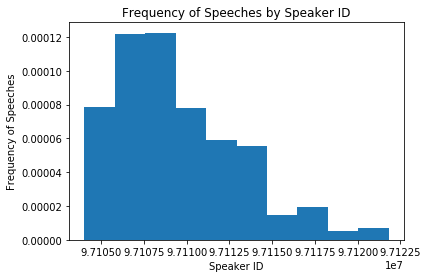

<Figure size 4320x4320 with 0 Axes>

In [30]:
speakermap['speakerid'].plot.hist(density=True)
plt.xlabel("Speaker ID")
plt.ylabel("Frequency of Speeches")
plt.title("Frequency of Speeches by Speaker ID")
plt.figure(figsize=(60,60))
plt.show()

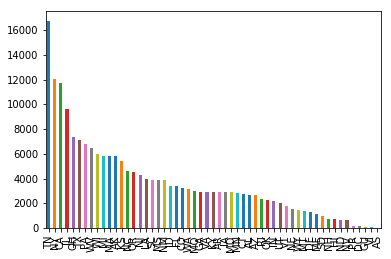

In [54]:
speakermap.state.value_counts().plot.bar()

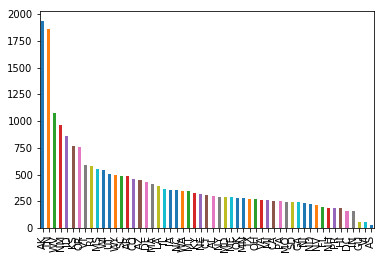

In [75]:
x = speakermap.state.value_counts()/speakermap_unique.state.value_counts()
y = x.sort_values(ascending=False)
y.plot.bar()

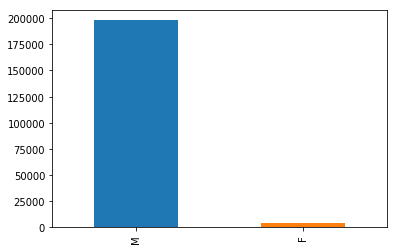

In [55]:
speakermap.gender.value_counts().plot.bar()

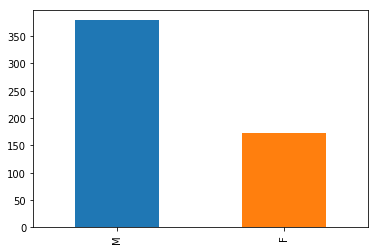

In [76]:
x = speakermap.gender.value_counts()/speakermap_unique.gender.value_counts()
y = x.sort_values(ascending=False)
y.plot.bar()

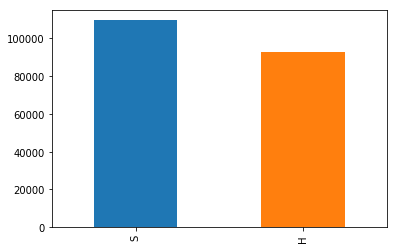

In [66]:
speakermap.chamber.value_counts().plot.bar()

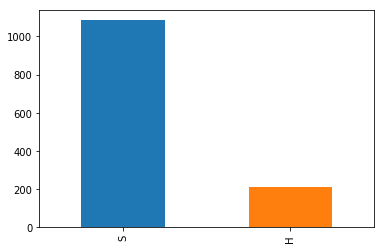

In [77]:
x = speakermap.chamber.value_counts()/speakermap_unique.chamber.value_counts()
y = x.sort_values(ascending=False)
y.plot.bar()

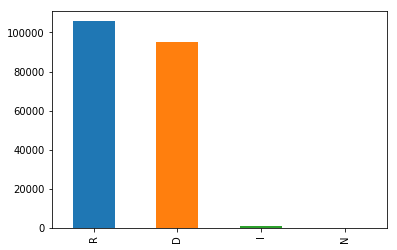

In [51]:
speakermap.party.value_counts().plot.bar()

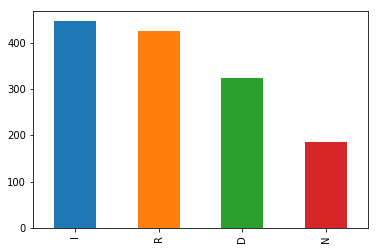

In [78]:
x = speakermap.party.value_counts()/speakermap_unique.party.value_counts()
y = x.sort_values(ascending=False)
y.plot.bar()